In [1]:
import pandas as pd

In [5]:
bike=pd.read_csv(r'C:\Users\Asus\Downloads\drive-download-20230328T081257Z-001\data\data\daily-bike-share.csv')

In [7]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


# 
instant: A unique row identifier

dteday: date 

season: 1: spring, 2: summer, 3: fall, 4: Winter

yr: year 0:2011, 1:2012

month: 1: jan......; 12: dec

holiday: 0: not a public holiday; 1: public holiday

weekday 0: sunday......; 6:saturday

weathersit: 1:clear, 2:mist/cloud, 3:light rain/snow 4:heavy rain/hailstorm/fog


In [10]:
bike.shape

(731, 14)

In [12]:
bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
dtype: int64

In [14]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000


In [18]:
numeric_features= ['temp', 'atemp', 'hum', 'windspeed']

In [20]:
bike[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0.98, 'Rental Distribution')

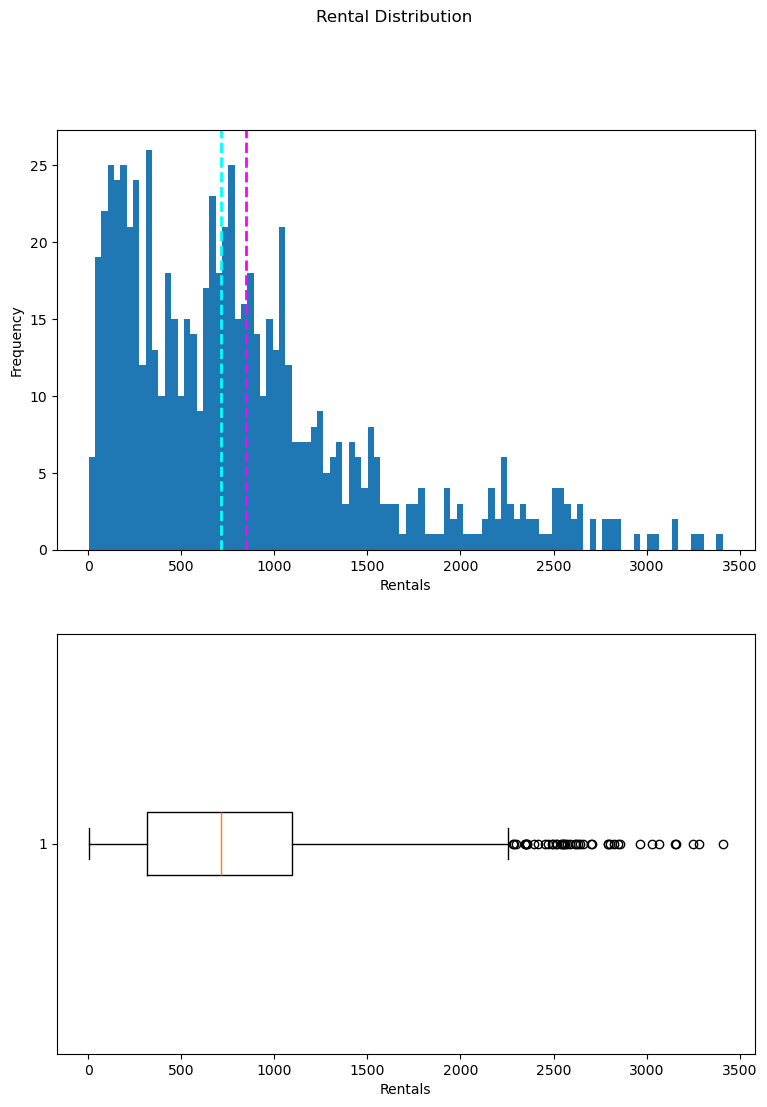

In [24]:
label = bike ['rentals']
fig, ax=plt.subplots(2,1, figsize=(9,12))
#plot the histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Rentals')

#add lines for the mean, median and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

#plot the boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

#Add a title to the figure
fig.suptitle('Rental Distribution')



(array([204., 144., 165.,  89.,  44.,  23.,  26.,  22.,   9.,   5.]),
 array([2.0000e+00, 3.4280e+02, 6.8360e+02, 1.0244e+03, 1.3652e+03,
        1.7060e+03, 2.0468e+03, 2.3876e+03, 2.7284e+03, 3.0692e+03,
        3.4100e+03]),
 <BarContainer object of 10 artists>)

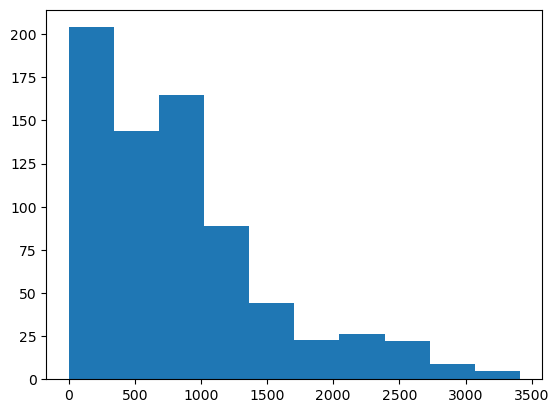

In [26]:
plt.hist(bike['rentals'])

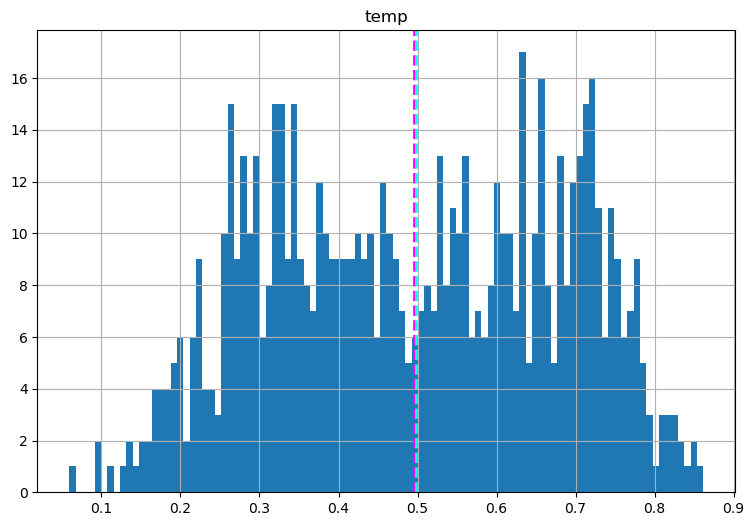

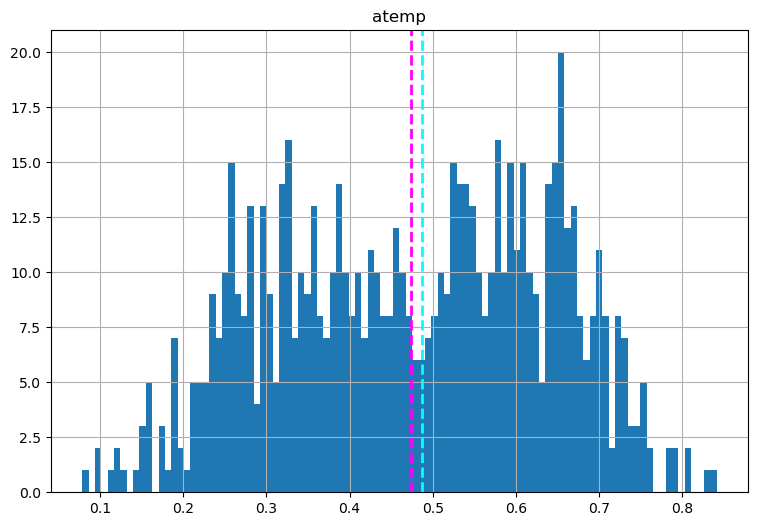

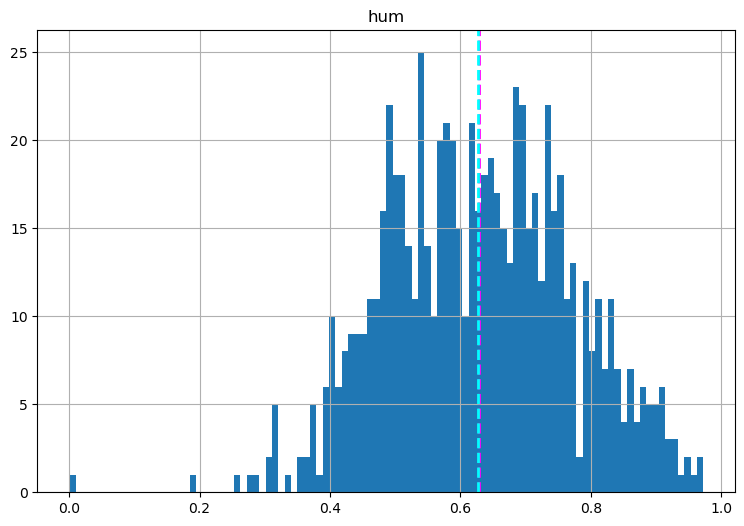

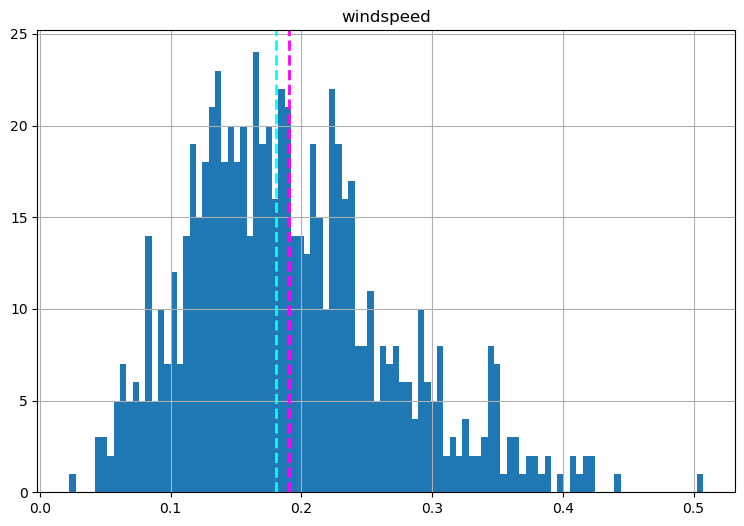

In [28]:
#col='temp'
for col in numeric_features:
    fig= plt.figure(figsize=(9,6))
    ax=fig.gca() #get current axis
    feature=bike[col] 
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

In [30]:
categorical_features=['season','mnth','holiday','weekday','workingday','weathersit']

In [32]:
bike['season'].value_counts().sort_index()

season
1    181
2    184
3    188
4    178
Name: count, dtype: int64

<Axes: xlabel='season'>

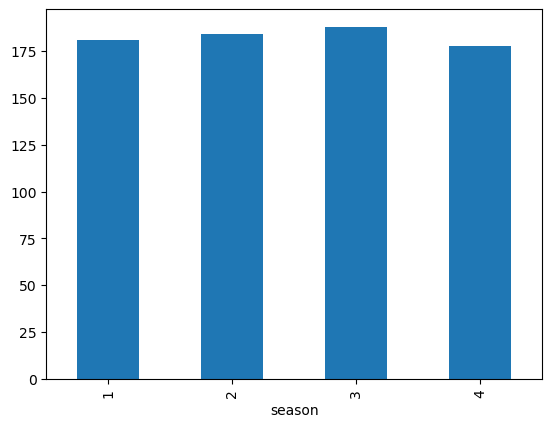

In [34]:
bike['season'].value_counts().sort_index().plot.bar()

<Axes: ylabel='count'>

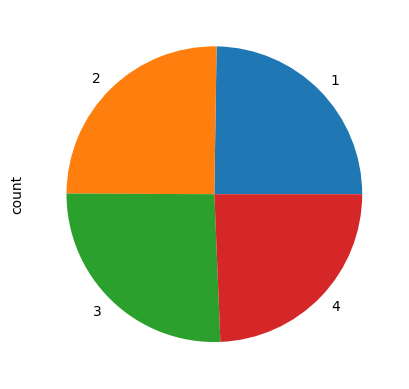

In [36]:
bike['season'].value_counts().sort_index().plot.pie()

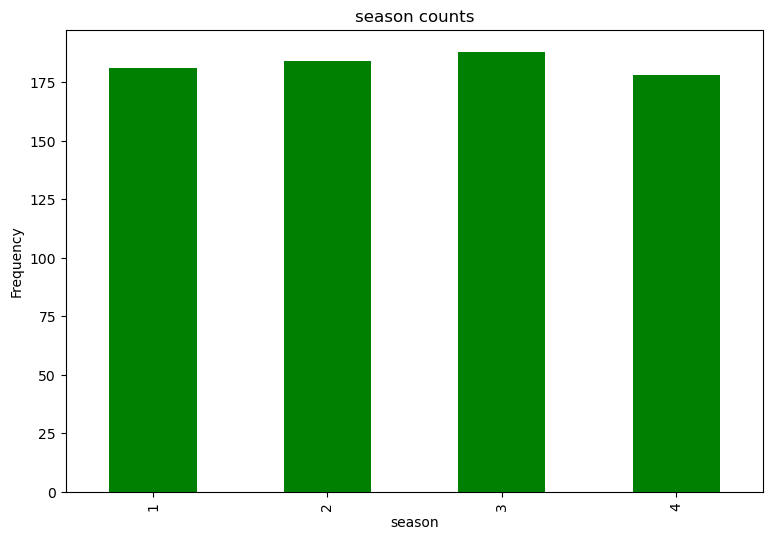

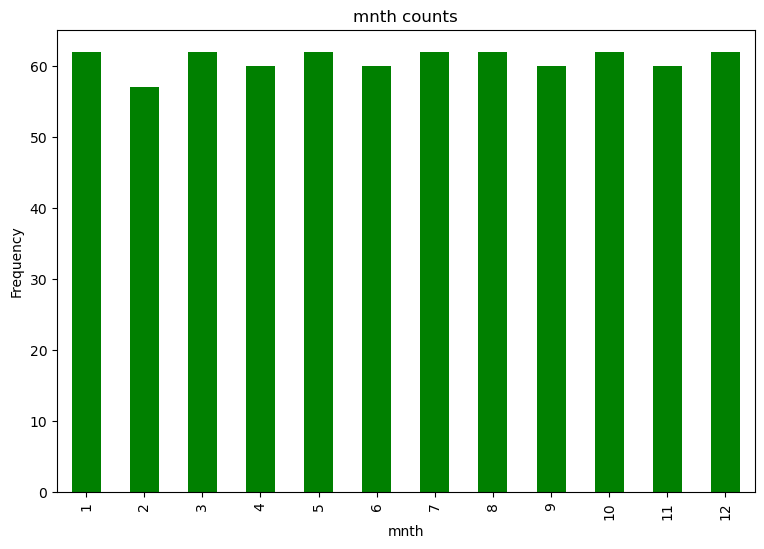

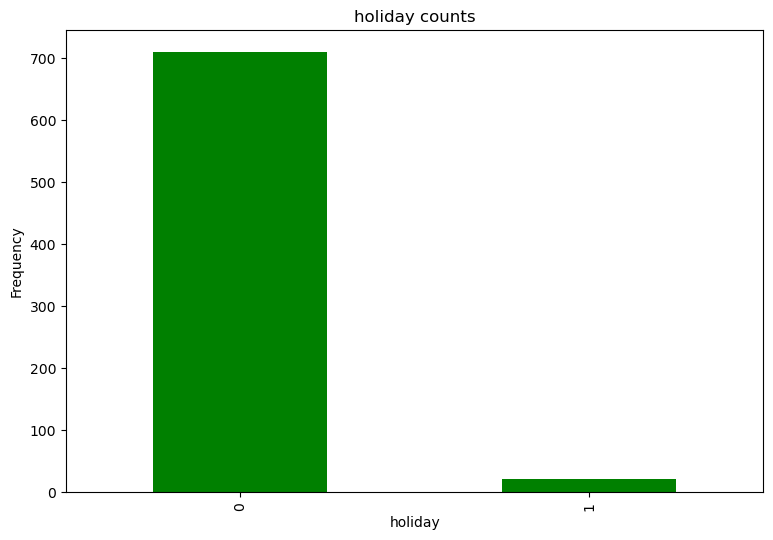

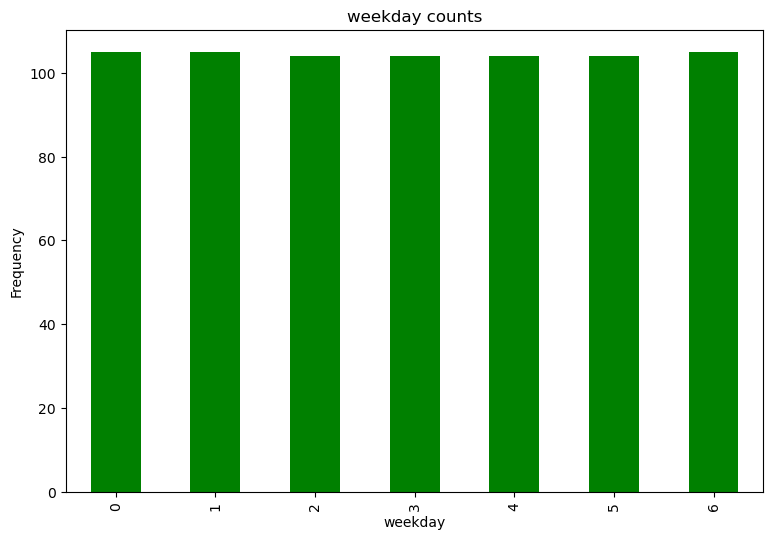

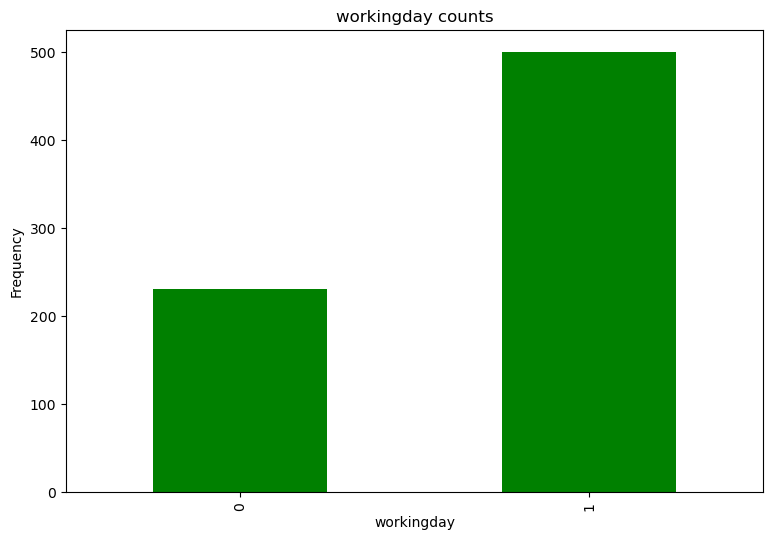

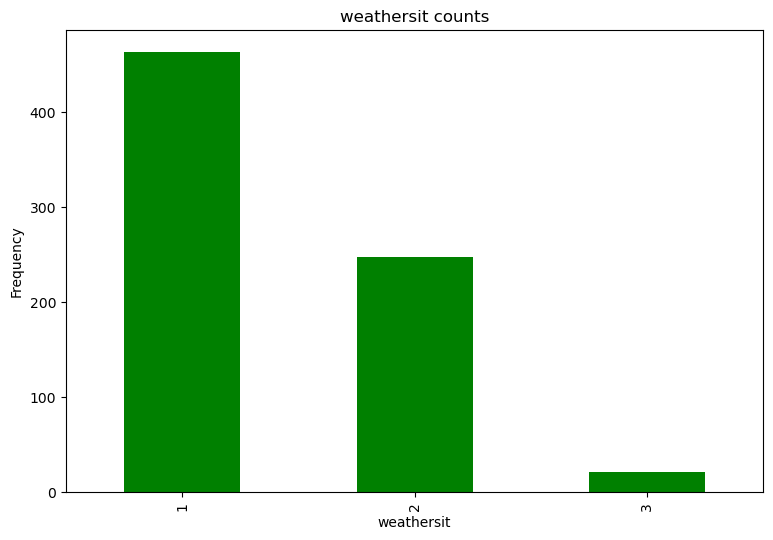

In [38]:
for col in categorical_features:
    counts = bike[col].value_counts().sort_index()
    fig= plt.figure(figsize=(9,6))
    ax=fig.gca() #get current axis
    counts.plot.bar(ax=ax, color='Green')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.show()

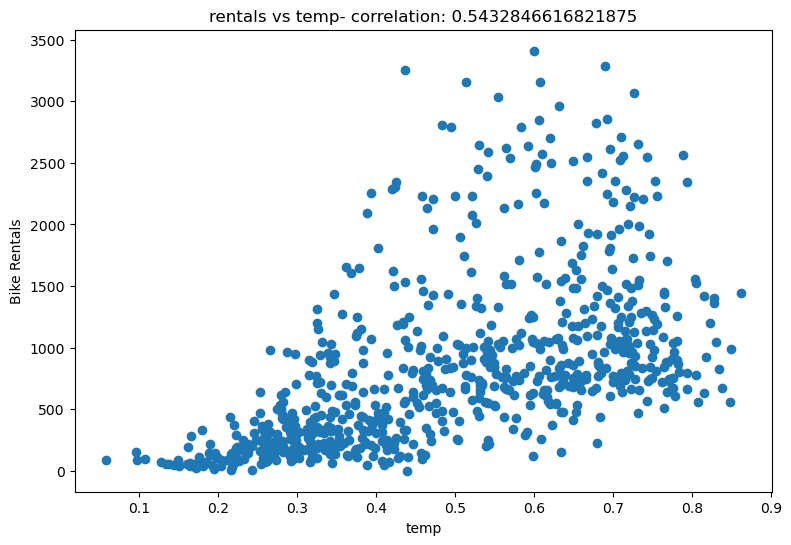

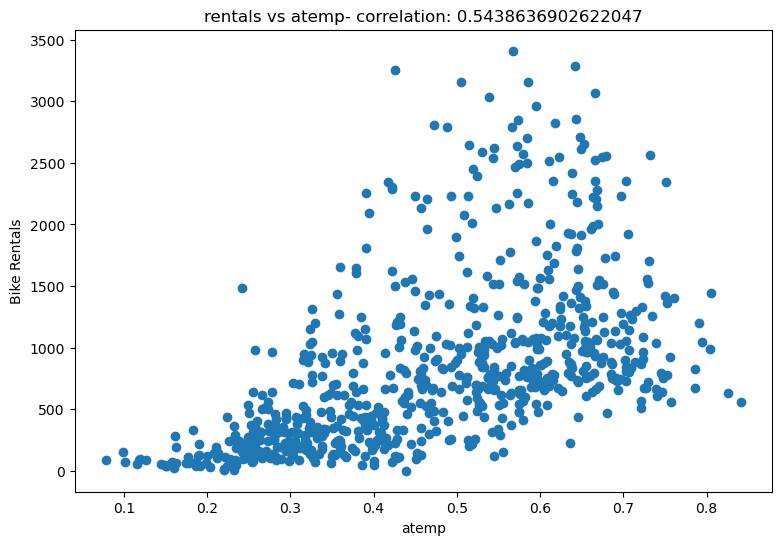

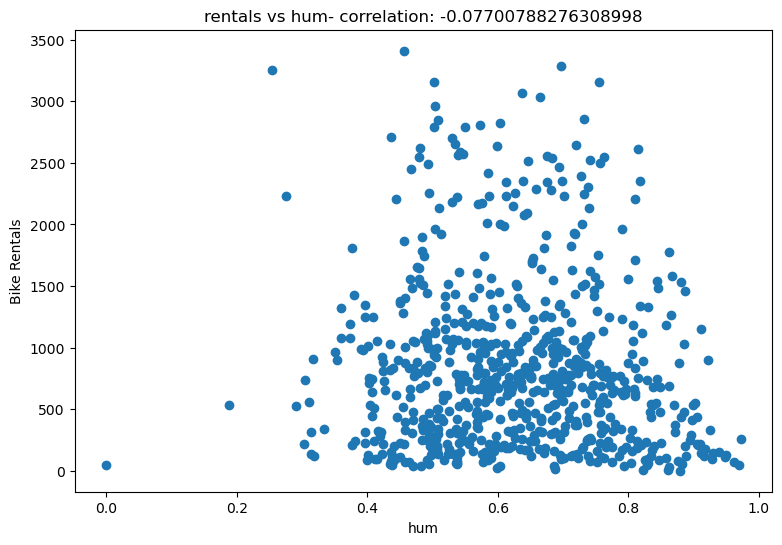

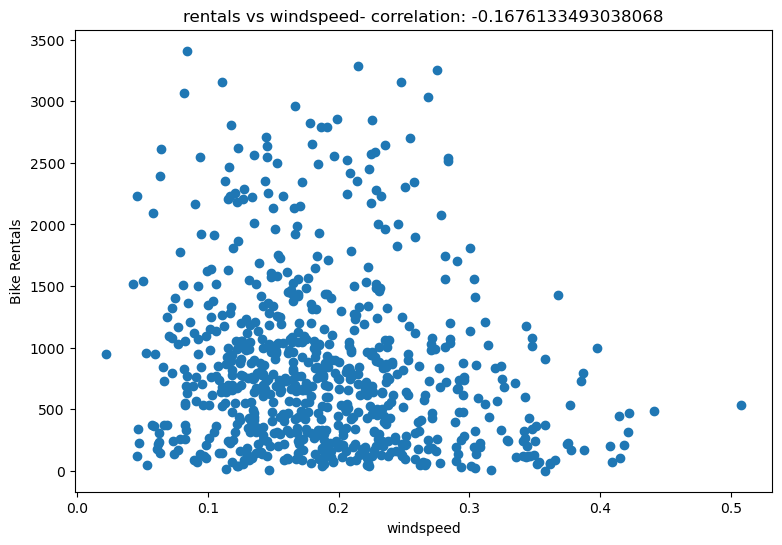

In [40]:
for col in numeric_features:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    feature=bike[col]
    label=bike['rentals']
    correlation=feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()

In [42]:
categorical_features

['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

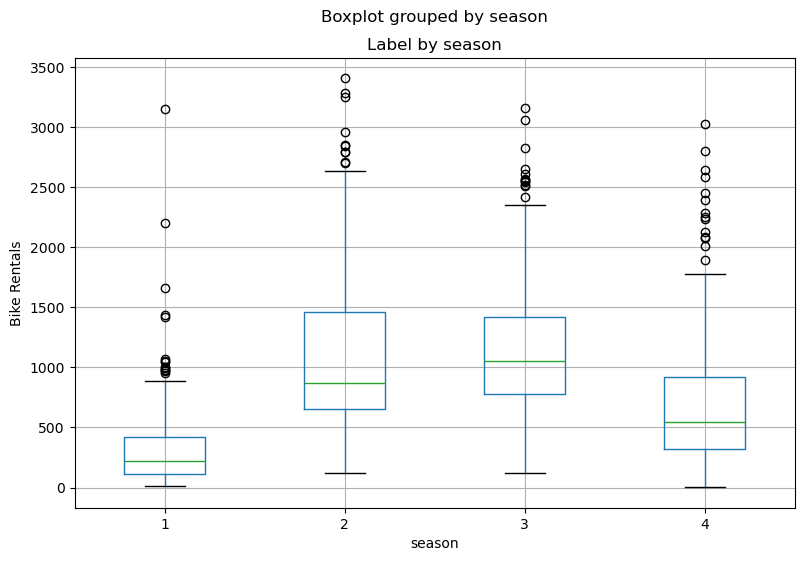

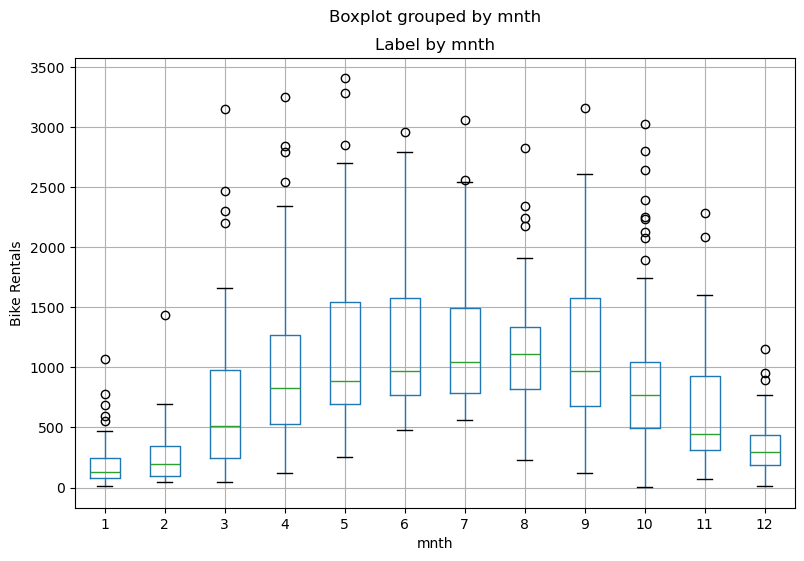

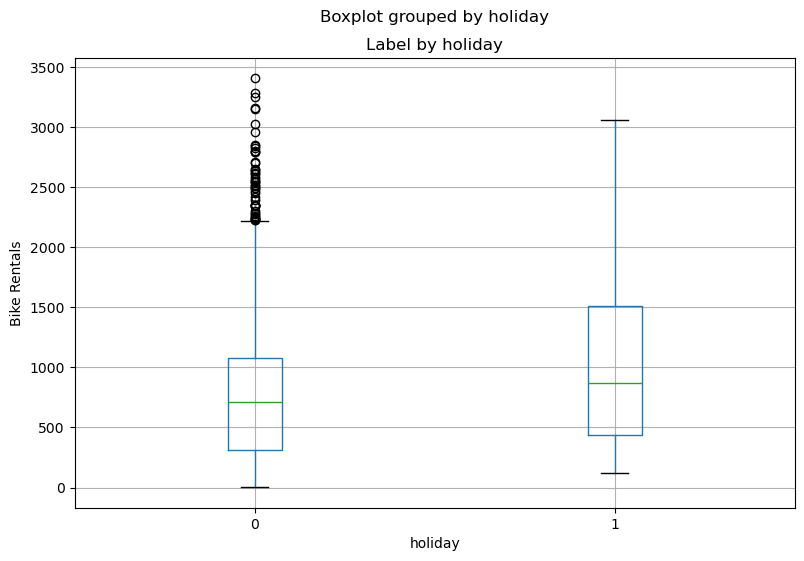

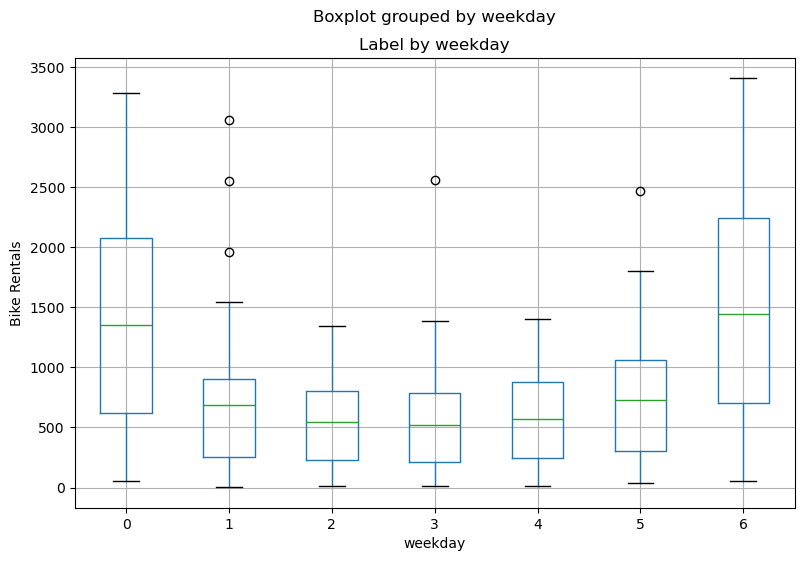

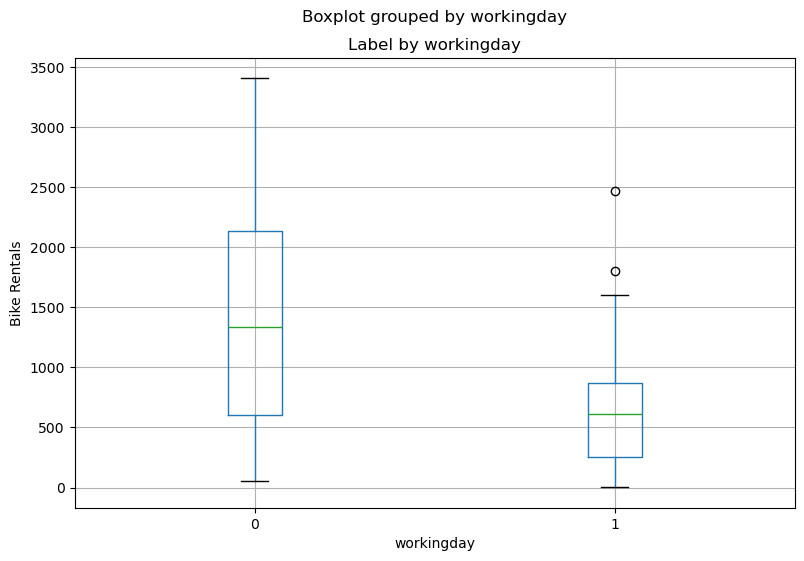

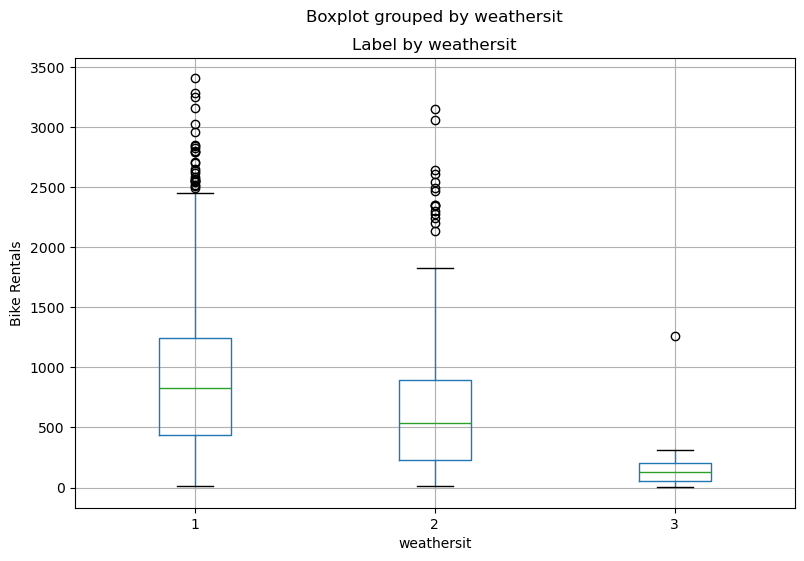

In [44]:
for col in categorical_features:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    bike.boxplot(column='rentals', by = col, ax=ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel('Bike Rentals')
plt.show()

In [46]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [48]:
# Train a Regression model

In [50]:
features=['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit','temp', 'atemp', 'hum', 'windspeed']
x,y= bike[features].values, bike['rentals'].values

In [52]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

In [56]:
print ('Training Set: %d rows\nTest Set: %d rows' % (x_train.shape[0], x_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


In [58]:
from sklearn.linear_model import LinearRegression

In [60]:
model = LinearRegression().fit(x_train, y_train)
print(model)

LinearRegression()


In [62]:
# Evaluation of Model

In [64]:
import numpy as np

In [66]:
predictions=model.predict(x_test)

In [68]:
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ',y_test[:10])

Predicted labels:  [ 335. 1000. 2372.  749.  480. 1793. 1111. 1676.  652. 1769.]
Actual labels   :  [ 466  647  987 1001  196 2258  784 1549  529 2622]


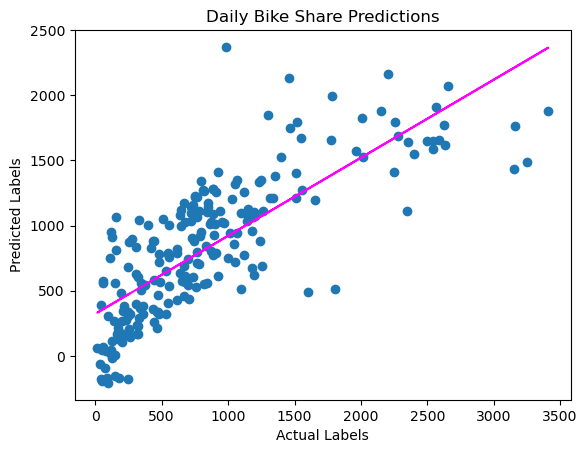

In [70]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')


#overlay the regression line

z=np.polyfit(y_test, predictions,1)
p=np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

mse=mean_squared_error(y_test, predictions)
print('MSE: ', mse)


rmse=np.sqrt(mse)
print('RMSE: ', rmse)

r2=r2_score(y_test, predictions)
print('R2: ', r2)

MSE:  194573.3634120692
RMSE:  441.10470799127637
R2:  0.617180133611662
